In [1]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Given that our equation of motion is given as ($d^2\phi$/d$t^2$) = -(g/R)$\phi$. Our resulting equation can be broken up into two cases: linear approximation sin$\phi$ $\approx$ $\phi$ and nonlinear case. For nonlinear case, if we define $\omega$ = d$\phi$/dt we can use numerical integration odeint to solve our ODE system. 

In [2]:
# Define a function to solve the ODE system
def pendulum(phi_0, t):
    phi_n, omega_n = phi_0
    dydt = [omega_n, -(g/R)*np.sin(phi_n)]
    return dydt

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
# Parameters
g = 9.81
R = 1.
p = np.pi

time = np.arange(0,4,0.001)


In [5]:
# Initial conditions
phi_0 = p/2
omega_0 = 0.0

In [6]:
# Find phi in nonlinear case
phi = odeint(pendulum, [phi_0, omega_0], time)

In [7]:
natural_phi = np.sqrt(g/R)
phi_lin = [phi_0*np.cos(natural_phi*t) for t in time]

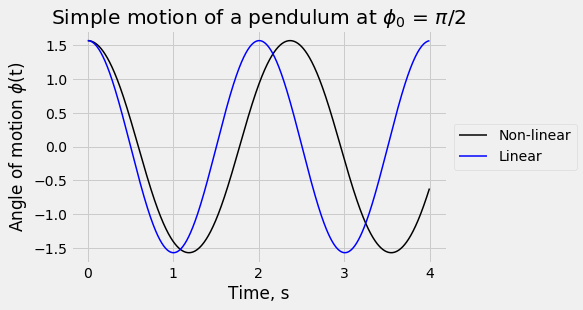

In [8]:
# Plot and save file to pdf
f = plt.figure()
plt.plot(time,phi[:,0], 'black', linewidth = 1.5, label = 'Non-linear')
plt.plot(time,phi_lin, 'blue', linewidth = 1.5, label = 'Linear')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Time, s')
plt.ylabel('Angle of motion $\phi$(t)')
plt.title('Simple motion of a pendulum at $\phi_0$ = $\pi/2$')

plt.show()
f.savefig("Pendulum.pdf", format = 'pdf', bbox_inches = "tight")

In [9]:
# Initial conditions
phi_02 = 3.1
omega_02 = 0.0

In [10]:
# Find phi in nonlinear case
phi2 = odeint(pendulum, [phi_02, omega_02], time)

In [11]:
natural_phi2 = np.sqrt(g/R)
phi_lin2 = [phi_02*np.cos(natural_phi*t) for t in time]

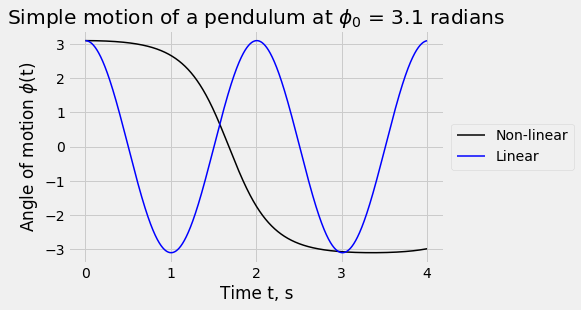

In [12]:
# Plot the motion of a simple pendulum for initial condition of 3.1 radians
f = plt.figure()
plt.plot(time,phi2[:,0], 'black', linewidth = 1.5, label = 'Non-linear')
plt.plot(time,phi_lin2, 'blue', linewidth = 1.5, label = 'Linear')

plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Time t, s')
plt.ylabel('Angle of motion $\phi$(t)')
plt.title('Simple motion of a pendulum at $\phi_0$ = 3.1 radians')

plt.show()
f.savefig("PendulumPb.pdf", format = 'pdf', bbox_inches = "tight")

 The resulting function is periodic for all initial conditions we can find 1/4 of the period when the phi is zero. Thus, if we loop odeint for every intial condition between $\phi_0$ = [0,3.1] and find when the element of the time array is when phi equals zero for the first time, we know the period of the odeint. 

In [13]:
k = 500
phi_initial_arr = np.linspace(0.10,3.1, k)
T_per = np.zeros(k)
nat_fre = np.sqrt(g/R) 
# Find the element when phi is zero
for j in range(k): 
    
    PenOde = odeint(pendulum, [phi_initial_arr[j],0.0],time)
    m = 0
    while(PenOde[m,0]>=0.0):
        m = m+ 1
    
    T_per[j] = 4.*time[m]

t_2 = (2.*p*np.sqrt(R/g))*np.ones(k)
    

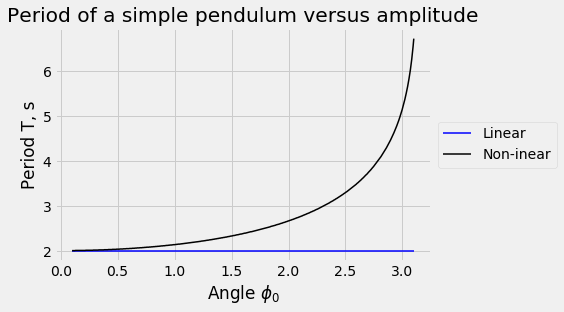

In [14]:
f = plt.figure()

plt.plot(phi_initial_arr,t_2, 'blue', linewidth = 1.5, label = 'Linear')
plt.plot(phi_initial_arr,T_per,'black', linewidth = 1.5, label = 'Non-inear')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Period T, s')
plt.xlabel('Angle $\phi_0$')
plt.title('Period of a simple pendulum versus amplitude')

plt.show()
f.savefig("PendulumPc.pdf", format = 'pdf', bbox_inches = "tight")

In [15]:
# Put the natural angular frequency into an array
f_2 = 2*p/t_2

# Find the natural frequency of the nonlinear pendulum
F_fre = 2.*p/T_per
natural_phi2 = np.sqrt(g/R)

# Find when the freuency deviates from 0.98
deviation = np.where(F_fre <= 0.98*natural_phi2)

q = np.asarray(deviation)
print(q)

# Manually find the array point where the frequency deviates from 2%
print(phi_initial_arr[75])

[[ 75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
   93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110
  111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
  129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146
  147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164
  165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182
  183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200
  201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
  219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236
  237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254
  255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272
  273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290
  291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308
  309 310 311 312 313 314 315 316 317 

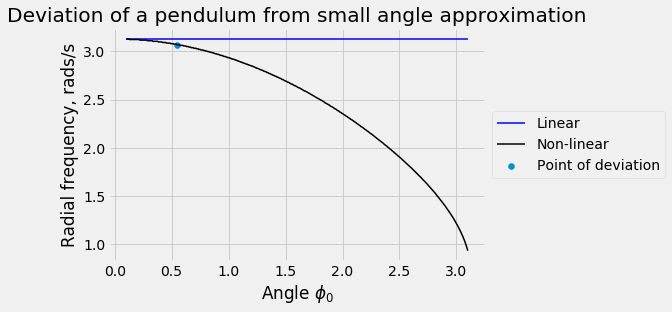

In [16]:

# Plot the figures
f = plt.figure()
plt.plot(phi_initial_arr,f_2, 'blue', linewidth = 1.5, label = 'Linear')
plt.plot(phi_initial_arr,F_fre,'black', linewidth = 1.5, label = 'Non-linear')
plt.scatter(phi_initial_arr[75],F_fre[75], label = 'Point of deviation')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.ylabel('Radial frequency, rads/s')
plt.xlabel('Angle $\phi_0$')
plt.title('Deviation of a pendulum from small angle approximation')

plt.show()
f.savefig("PendulumPcfre.pdf", format = 'pdf', bbox_inches = "tight")

The amplitude of the simple pendulum deviates around 0.5509 radians, which as seen in "Deviation of a pendulum from a small angle approximation" (or pdf file `PendulumPcfre.pdf`). This is expected since at larger angles the nonlinear dynamics dominates the motion since sin$\phi$ $ \approx$/$ \approx$ $\phi$ at larger angles. 